In [631]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [632]:
df = pd.read_csv('soci_econ_country_profiles.csv')

df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


In [633]:
df.describe(include='all')

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
count,66.000000,66,66,6.600000e+01,6.600000e+01,66.000000,66.000000,6.600000e+01,66.000000,66.000000,...,64.000000,66.000000,66.000000,66.000000,63.000000,6.600000e+01,6.600000e+01,58.000000,57.000000,66.000000
unique,NaN,66,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Argentina,EasternEurope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32.500000,NaN,NaN,1.383839e+06,8.655136e+04,367.760606,103.093939,1.054143e+06,2.503030,23531.648485,...,3.061447,80.681818,75.288773,77.919495,1.921359,4.264709e+07,4.363543e+07,17.514902,26.399717,72.319212
std,19.196354,NaN,NaN,3.110735e+06,2.381736e+05,1296.705411,32.661861,2.626195e+06,4.084077,20582.322358,...,4.198392,4.239907,4.760363,4.403602,1.486484,1.144292e+08,1.218393e+08,6.354347,14.262319,17.747912
min,0.000000,NaN,NaN,7.190000e+02,1.180000e+03,3.200000,85.100000,1.005200e+04,-9.900000,1410.400000,...,-0.838195,67.064000,60.162000,63.538000,0.310632,5.891320e+05,5.905480e+05,0.066457,2.026514,18.384000
25%,16.250000,NaN,NaN,6.536700e+04,7.155000e+03,46.725000,95.450000,1.668350e+05,1.425000,6253.775000,...,1.290593,78.507000,72.532000,75.462122,1.076050,3.434816e+06,3.428920e+06,13.026485,16.217291,58.596750
50%,32.500000,NaN,NaN,2.840535e+05,1.886700e+04,104.100000,97.350000,3.052720e+05,2.400000,15323.500000,...,1.961454,80.843000,75.058500,77.790244,1.422609,9.713157e+06,9.315708e+06,16.978874,24.019106,75.058000
75%,48.750000,NaN,NaN,7.929618e+05,6.588150e+04,211.325000,100.150000,7.422105e+05,3.775000,40398.550000,...,3.464844,84.000000,79.475000,81.640854,2.207984,3.422686e+07,3.254150e+07,22.450806,34.292679,86.162000


# Clustering

## Data Wrangling

### Memilih fitur yang digunakan

In [634]:
df_econ= df[['Cost Of Living Index',
             'Restaurant Price Index',
             'Rent Index',
             'Grocery Index',
             'Local Purchasing Power Index'
             ]]

In [635]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cost Of Living Index          66 non-null     float64
 1   Restaurant Price Index        66 non-null     float64
 2   Rent Index                    66 non-null     float64
 3   Grocery Index                 66 non-null     float64
 4   Local Purchasing Power Index  66 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB


### Mengatasi Missing Value

In [636]:
df_econ.isna().sum()

Cost Of Living Index            0
Restaurant Price Index          0
Rent Index                      0
Grocery Index                   0
Local Purchasing Power Index    0
dtype: int64

In [637]:
df_econ = df_econ.interpolate(method='linear')

df_econ.isna().sum()

Cost Of Living Index            0
Restaurant Price Index          0
Rent Index                      0
Grocery Index                   0
Local Purchasing Power Index    0
dtype: int64

### Mengatasi Outlier

In [638]:
z_scores = np.abs(zscore(df_econ))

threshold = 3

df_econ = df_econ[(z_scores < threshold).all(axis=1)]

print(f"Data tanpa outlier: {df_econ.shape}")


Data tanpa outlier: (64, 5)


### Visualisasi Corr Data

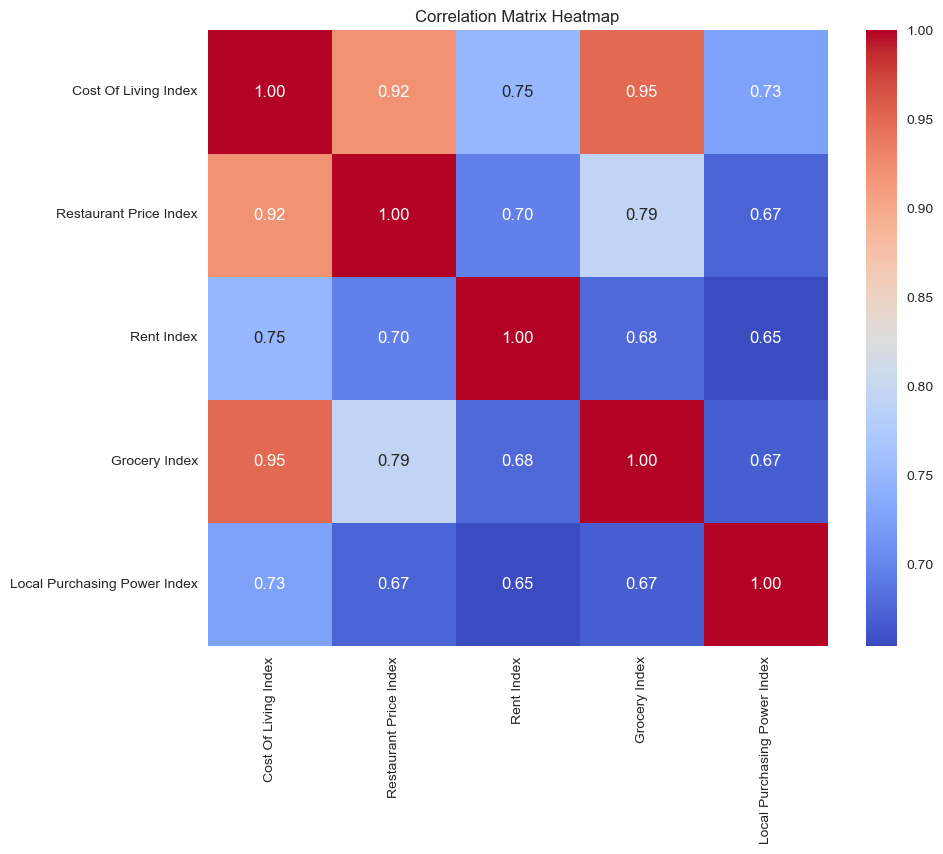

In [639]:
econ_corr = df_econ.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(econ_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Data Preproccessing

### Minmax Scaler

In [640]:
numerik = df_econ.select_dtypes(include=['number'])
scalerm = MinMaxScaler()
econ_scaledm = scalerm.fit_transform(numerik)

econ_scaledm



array([[0.35985706, 0.33736973, 0.13637061, 0.31588903, 0.40868597],
       [0.69446099, 0.60287841, 0.575395  , 0.7296343 , 0.73192279],
       [0.58558666, 0.50183623, 0.31952753, 0.59079445, 0.68530067],
       [0.13674806, 0.21062035, 0.11013959, 0.10315259, 0.24558278],
       [0.63132817, 0.65468983, 0.37751189, 0.58965952, 0.65085375],
       [0.15116141, 0.07781638, 0.01825433, 0.13556116, 0.355902  ],
       [0.36581298, 0.25756824, 0.16091425, 0.28549811, 0.28975501],
       [0.16831447, 0.13081886, 0.05951833, 0.14476671, 0.35671863],
       [0.56938654, 0.48903226, 0.38057984, 0.63366961, 0.77698589],
       [0.33031566, 0.27791563, 0.15953367, 0.30491803, 0.43006682],
       [0.26682549, 0.13200993, 0.20923455, 0.36229508, 0.47876763],
       [0.14401429, 0.08526055, 0.08682313, 0.12295082, 0.25449146],
       [0.30541989, 0.20992556, 0.07761927, 0.26355612, 0.42583519],
       [0.37772484, 0.41359801, 0.11121338, 0.31588903, 0.68723088],
       [0.22465753, 0.11523573, 0.

#### PCA

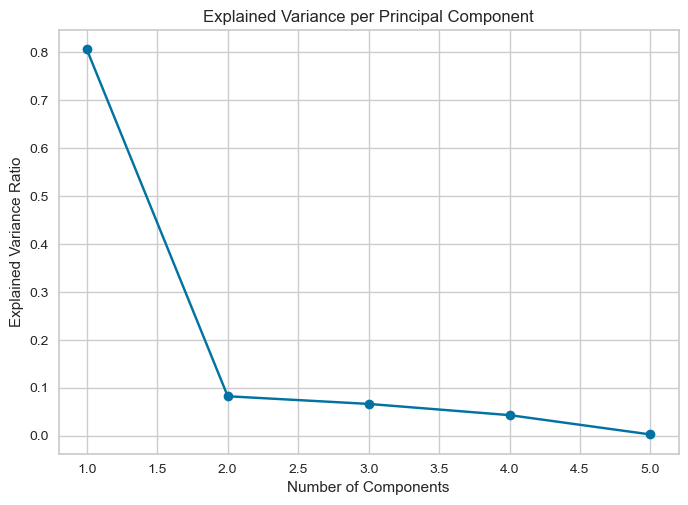

Jumlah komponen yang menjelaskan 90% variansi: 3


In [641]:
# Melakukan PCA
pca = PCA()
pca.fit(econ_scaledm)  # Gantilah dengan data yang telah distandardisasi

# Mengambil explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Menentukan n_components untuk menjelaskan 90% variansi
cumulative_variance = explained_variance_ratio.cumsum()
n_componentm = (cumulative_variance >= 0.90).argmax() + 1
print(f"Jumlah komponen yang menjelaskan 90% variansi: {n_componentm}")


In [642]:

# Misalkan df adalah DataFrame yang berisi data numerik

# Terapkan PCA untuk mereduksi dimensi
pca = PCA(n_components=n_componentm)  # Pilih jumlah komponen yang diinginkan  
pcam = pca.fit_transform(econ_scaledm)


### Standard Scaler

In [643]:
# scalers =StandardScaler()
# econ_scaleds = scalers.fit_transform(df_econ)

numerik = df_econ.select_dtypes(include=['number'])
scalers = StandardScaler()
econ_scaleds = scalerm.fit_transform(numerik)



econ_scaleds

array([[0.35985706, 0.33736973, 0.13637061, 0.31588903, 0.40868597],
       [0.69446099, 0.60287841, 0.575395  , 0.7296343 , 0.73192279],
       [0.58558666, 0.50183623, 0.31952753, 0.59079445, 0.68530067],
       [0.13674806, 0.21062035, 0.11013959, 0.10315259, 0.24558278],
       [0.63132817, 0.65468983, 0.37751189, 0.58965952, 0.65085375],
       [0.15116141, 0.07781638, 0.01825433, 0.13556116, 0.355902  ],
       [0.36581298, 0.25756824, 0.16091425, 0.28549811, 0.28975501],
       [0.16831447, 0.13081886, 0.05951833, 0.14476671, 0.35671863],
       [0.56938654, 0.48903226, 0.38057984, 0.63366961, 0.77698589],
       [0.33031566, 0.27791563, 0.15953367, 0.30491803, 0.43006682],
       [0.26682549, 0.13200993, 0.20923455, 0.36229508, 0.47876763],
       [0.14401429, 0.08526055, 0.08682313, 0.12295082, 0.25449146],
       [0.30541989, 0.20992556, 0.07761927, 0.26355612, 0.42583519],
       [0.37772484, 0.41359801, 0.11121338, 0.31588903, 0.68723088],
       [0.22465753, 0.11523573, 0.

#### PCA

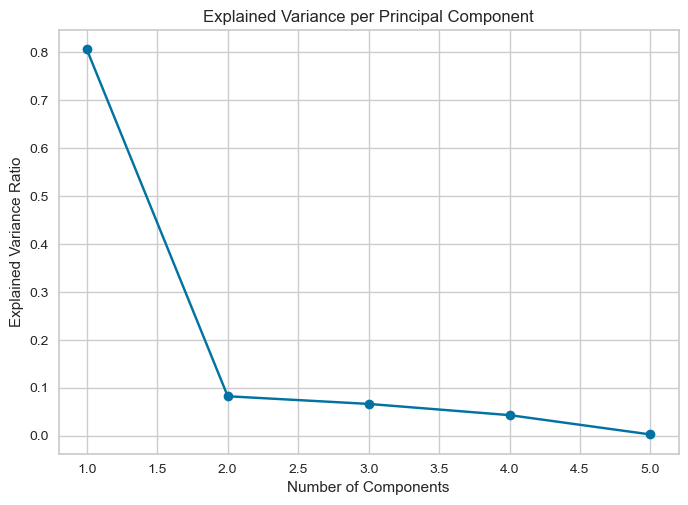

Jumlah komponen yang menjelaskan 90% variansi: 3


In [644]:
# Melakukan PCA
pca = PCA()
pca.fit(econ_scaleds)  # Gantilah dengan data yang telah distandardisasi

# Mengambil explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Menentukan n_components untuk menjelaskan 90% variansi
cumulative_variance = explained_variance_ratio.cumsum()
n_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Jumlah komponen yang menjelaskan 90% variansi: {n_components}")


In [645]:

# Misalkan df adalah DataFrame yang berisi data numerik

# Terapkan PCA untuk mereduksi dimensi
pca = PCA(n_components=n_components)  # Pilih jumlah komponen yang diinginkan  
pcas = pca.fit_transform(econ_scaleds)


### Robust Scaler

In [646]:
numerik = df_econ.select_dtypes(include=['number'])
scalerr = StandardScaler()
econ_scaledr = scalerr.fit_transform(numerik)



econ_scaledr

array([[-0.0669357 ,  0.11824772, -0.45611127, -0.18067214, -0.41488238],
       [ 1.40865376,  1.26146037,  1.52390933,  1.6273753 ,  1.03543896],
       [ 0.92852248,  0.82639851,  0.36993506,  1.02065167,  0.82625159],
       [-1.0508371 , -0.42750277, -0.57441439, -1.11032044, -1.14670508],
       [ 1.13024065,  1.4845471 ,  0.63144722,  1.01569208,  0.67169277],
       [-0.98727487, -0.99932278, -0.98882122, -0.96869648, -0.65171713],
       [-0.04067031, -0.22535713, -0.3454183 , -0.31347904, -0.94851004],
       [-0.91163055, -0.77110762, -0.80271865, -0.92846867, -0.64805302],
       [ 0.85708063,  0.77126788,  0.64528384,  1.2080141 ,  1.23763121],
       [-0.19721202, -0.13774644, -0.35164478, -0.22861488, -0.31894932],
       [-0.47720105, -0.76597919, -0.1274915 ,  0.02212013, -0.10043513],
       [-1.01879333, -0.96727009, -0.67957272, -1.02380308, -1.10673297],
       [-0.30700134, -0.43049435, -0.72108258, -0.40936452, -0.33793607],
       [ 0.01186046,  0.44646728, -0.5

#### PCA

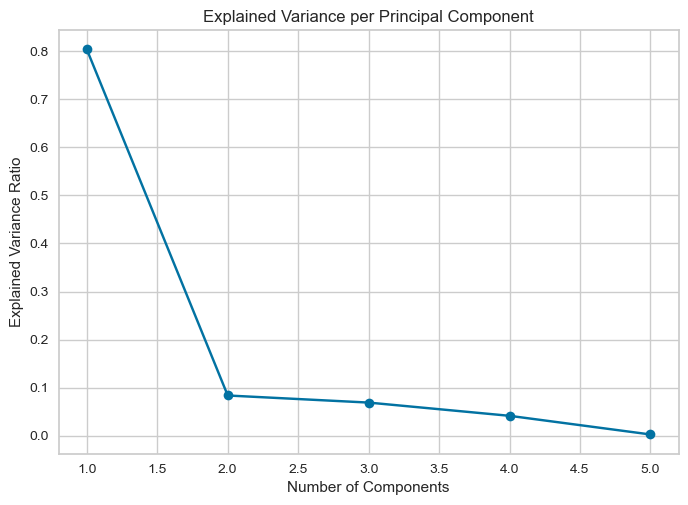

Jumlah komponen yang menjelaskan 90% variansi: 3


In [647]:
# Melakukan PCA
pca = PCA()
pca.fit(econ_scaledr)  # Gantilah dengan data yang telah distandardisasi

# Mengambil explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Menentukan n_components untuk menjelaskan 90% variansi
cumulative_variance = explained_variance_ratio.cumsum()
n_componentr = (cumulative_variance >= 0.90).argmax() + 1
print(f"Jumlah komponen yang menjelaskan 90% variansi: {n_componentr}")


In [648]:

# Misalkan df adalah DataFrame yang berisi data numerik

# Terapkan PCA untuk mereduksi dimensi
pca = PCA(n_components=n_componentr)  # Pilih jumlah komponen yang diinginkan  
pcar = pca.fit_transform(econ_scaledr)


## Model Train

#### Menggunakan Minmax Scaler

##### K Means

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

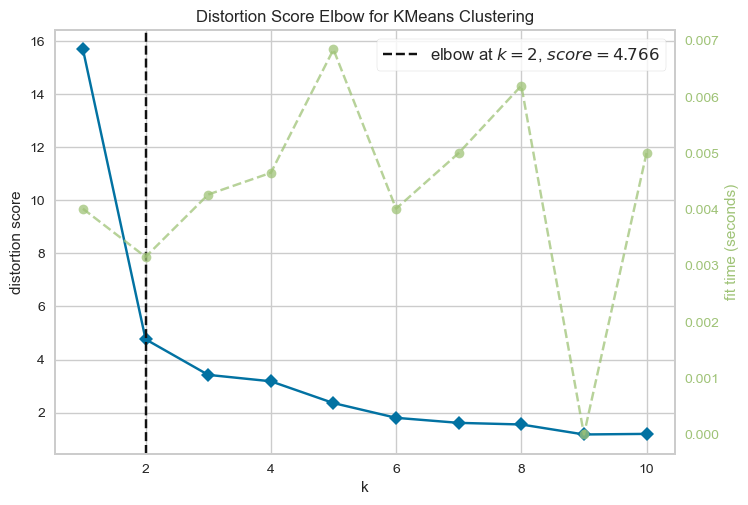

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [649]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit data ke visualizer
visualizer.fit(pcam)
optimal_clusters_minmax = visualizer.elbow_value_

# Tampilkan visualisasi
visualizer.show()

In [650]:
kmeans = KMeans(n_clusters=optimal_clusters_minmax,
                init='k-means++',      # Metode inisialisasi centroid
                n_init=10000,             # Jumlah percobaan
                max_iter=100000000000,          # Iterasi maksimal
                tol=1e-10000000,              # Ambang batas konvergensi
                random_state=42,       # Seed acak untuk hasil yang konsisten
                # algorithm='lloyd'
                )      # Pilihan algoritma

# Fit model ke data (misalnya, data distandardisasi)
kmeans_labels = kmeans.fit_predict(pcam)

# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(pcam, kmeans_labels)
print(f"Silhouette Score untuk KMeans: {kmeans_silhouette:.4f}")


d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score untuk KMeans: 0.6160


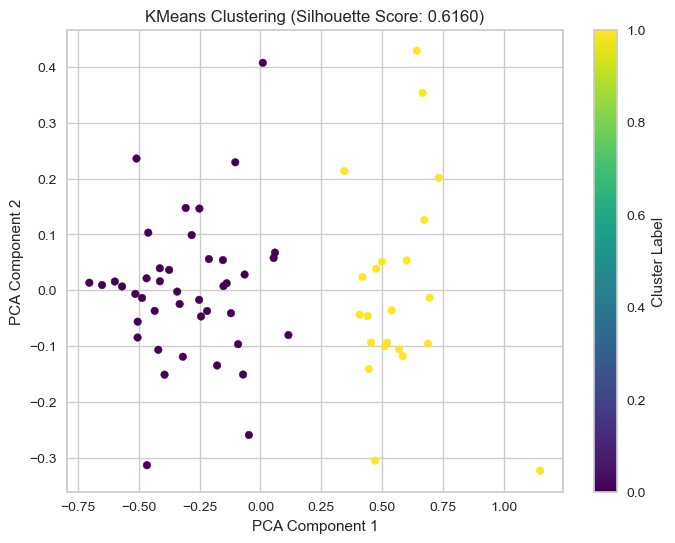

In [651]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(pcam)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
plt.title(f"KMeans Clustering (Silhouette Score: {kmeans_silhouette:.4f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  # Menampilkan colorbar
plt.show()

#### Menggunakan Standard Scaler

##### Kmeans

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

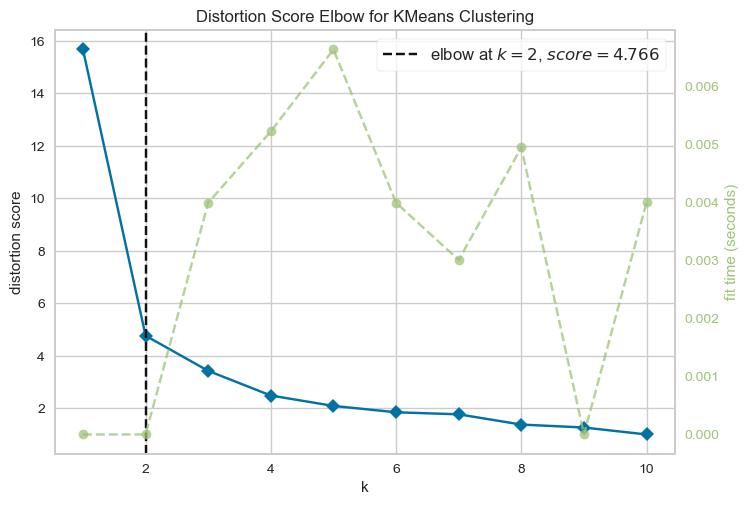

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [653]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit data ke visualizer
visualizer.fit(pcas)
optimal_clusters_standard = visualizer.elbow_value_

# Tampilkan visualisasi
visualizer.show()

In [654]:
kmeans = KMeans(n_clusters=optimal_clusters_standard,
                init='k-means++',      # Metode inisialisasi centroid
                n_init=10000,             # Jumlah percobaan
                max_iter=100000000000,          # Iterasi maksimal
                tol=1e-10000000,              # Ambang batas konvergensi
                random_state=42,       # Seed acak untuk hasil yang konsisten
                # algorithm='lloyd'
                )      # Pilihan algoritma

# Fit model ke data (misalnya, data distandardisasi)
kmeans_labels = kmeans.fit_predict(pcas)

# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(pcas, kmeans_labels)
print(f"Silhouette Score untuk KMeans: {kmeans_silhouette:.4f}")


d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score untuk KMeans: 0.6160


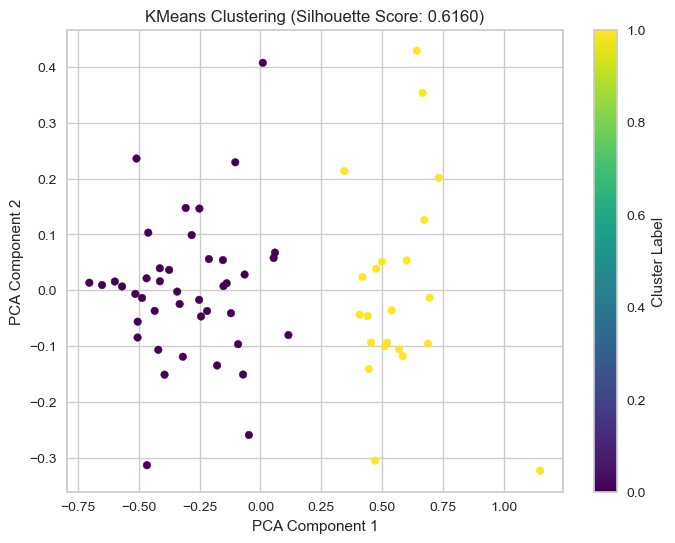

In [655]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(pcas)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
plt.title(f"KMeans Clustering (Silhouette Score: {kmeans_silhouette:.4f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  # Menampilkan colorbar
plt.show()

#### Menggunakan Robust Scaler

##### Kmeans

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

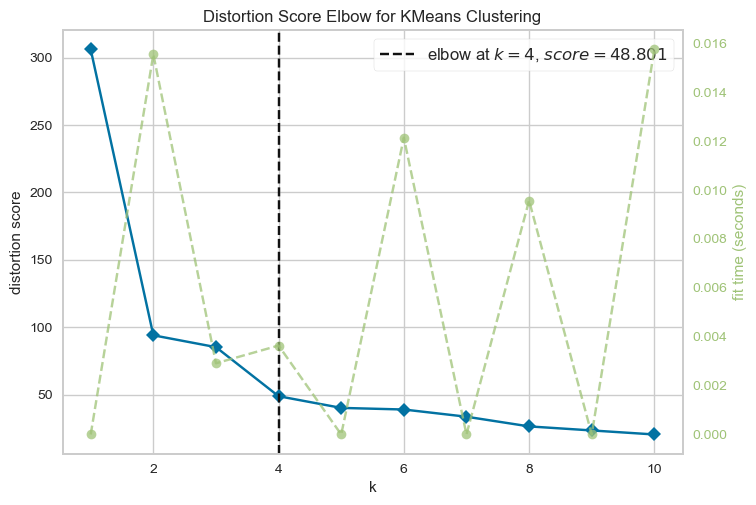

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [656]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit data ke visualizer
visualizer.fit(pcar)
optimal_clusters_robust = visualizer.elbow_value_

# Tampilkan visualisasi
visualizer.show()

In [657]:
kmeans = KMeans(n_clusters=optimal_clusters_robust,
                init='k-means++',      # Metode inisialisasi centroid
                n_init=10000,             # Jumlah percobaan
                max_iter=100000000000,          # Iterasi maksimal
                tol=1e-10000000,              # Ambang batas konvergensi
                random_state=42,       # Seed acak untuk hasil yang konsisten
                # algorithm='lloyd'
                )      # Pilihan algoritma

# Fit model ke data (misalnya, data distandardisasi)
kmeans_labels = kmeans.fit_predict(pcar)

# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(pcar, kmeans_labels)
print(f"Silhouette Score untuk KMeans: {kmeans_silhouette:.4f}")


d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score untuk KMeans: 0.4591


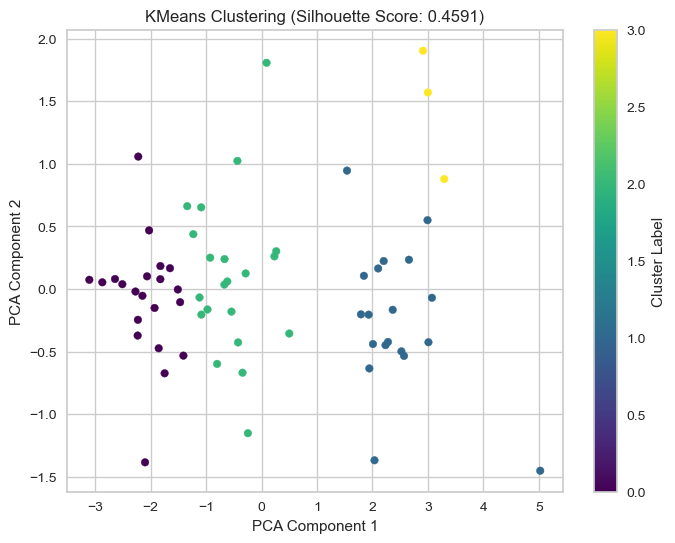

In [658]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(pcar)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
plt.title(f"KMeans Clustering (Silhouette Score: {kmeans_silhouette:.4f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  # Menampilkan colorbar
plt.show()

#### Tanpa Menggunakan Standarisai

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

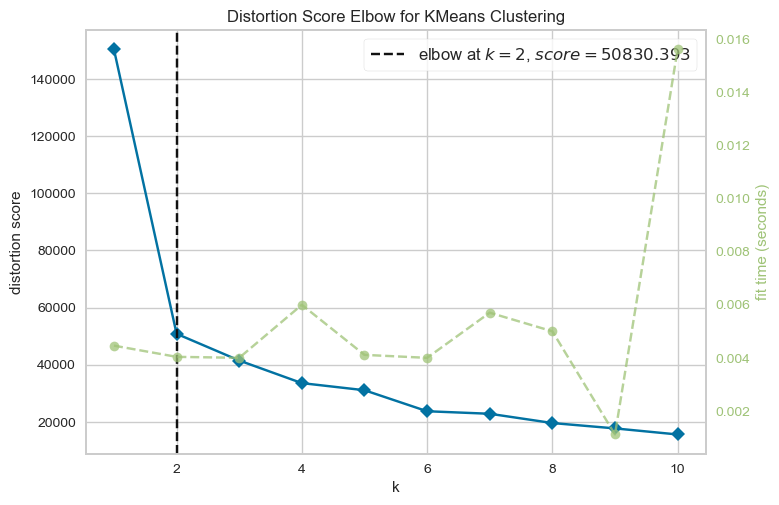

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [659]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit data ke visualizer
visualizer.fit(df_econ)
optimal_clusters = visualizer.elbow_value_

# Tampilkan visualisasi
visualizer.show()

In [660]:
kmeans = KMeans(n_clusters=optimal_clusters,
                init='k-means++',      # Metode inisialisasi centroid
                n_init=10,             # Jumlah percobaan
                max_iter=300,          # Iterasi maksimal
                tol=1e-10,              # Ambang batas konvergensi
                random_state=42,       # Seed acak untuk hasil yang konsisten
                algorithm='lloyd'
                )      # Pilihan algoritma

# Fit model ke data (misalnya, data distandardisasi)
kmeans_labels = kmeans.fit_predict(df_econ)

# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df_econ, kmeans_labels)
print(f"Silhouette Score untuk KMeans: {kmeans_silhouette:.4f}")


Silhouette Score untuk KMeans: 0.5665


d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


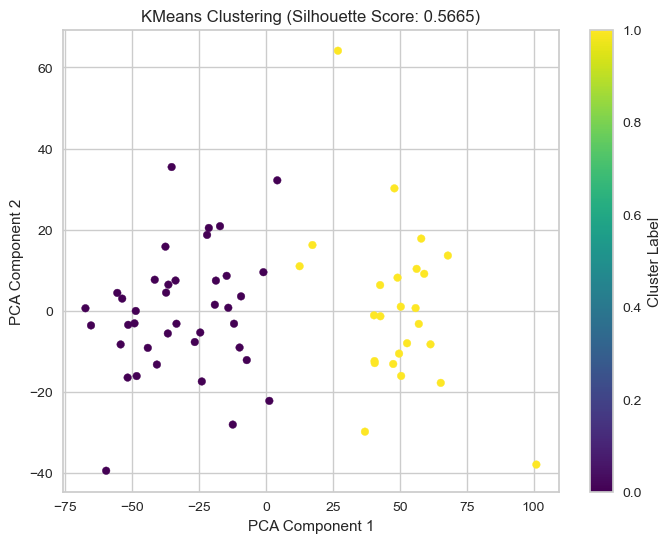

In [661]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_econ)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
plt.title(f"KMeans Clustering (Silhouette Score: {kmeans_silhouette:.4f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  # Menampilkan colorbar
plt.show()